# Muhammad Ardian Saputra   (DS)

# 1. Perform basic exploratory data analysis which should include the following and print out your insights at every step:

## A. The shape of the data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [73]:
df = pd.read_csv('insurance.csv')

In [74]:
df.shape

(1338, 7)

The shape of the data is (1338, 7). It means that there are 1338 rows and 7 columns.

## B. The data type of each attribute

In [75]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Age, BMI, Children, Charges column have a numeric data types. Age and Children have an integer data type. BMI and Charges have a floating point data types. Sex, Smoker, and Region have an object data types. Default object data types in data frame is a string.

## C. Checking the presence of missing values

In [76]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see that there is no missing value in all columns.

## D. 5 points summary of numerical attributes

In [77]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The five-number summary involves the calculation of 5 summary statistical quantities:
   * Median
   * 1st Quartile (25th percentile)
   * 3nd Quartile (75th percentile)
   * Minimum
   * Maximum

All the value of all the column that have a numeric data type can be seen in the table above.

* The age column data looks representative to the adult population.
* The BMI data have diverse category from Severe Thinness (<16) to Obese Class III (> 40). The people's average BMI is categorize as Obese Class I (30-35), and only 25% people have a normal or less BMI.
* If we see the children data there is only few people have more than 2 children and 75% of the people have 2 or less children. * Lastly the charges is higly skewed, the data gathers on the left side as most people just require basic medical care and only few suffer from cronic diseases that cost more.

## E. Distribution of 'bmi', 'age' and 'charges' columns

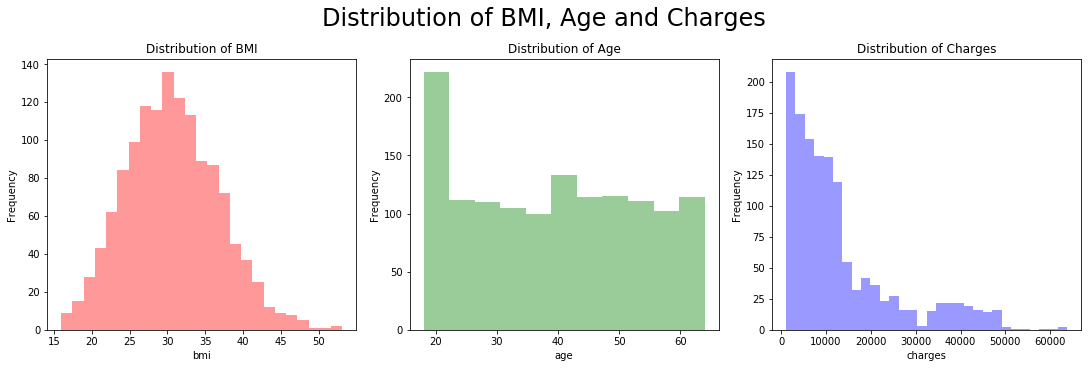

In [78]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)
sns.distplot(df.bmi, kde=False, color='r', ax=ax[0]);
sns.distplot(df.age, kde=False, color='g', ax=ax[1]);
sns.distplot(df.charges, kde=False, color='b', ax=ax[2]);
fig.suptitle('Distribution of BMI, Age and Charges', fontsize=24);
ax[0].set_title('Distribution of BMI');
ax[1].set_title('Distribution of Age');
ax[2].set_title('Distribution of Charges');
ax[0].set_ylabel('Frequency');
ax[1].set_ylabel('Frequency');
ax[2].set_ylabel('Frequency');

* The BMI distribution not have much positive skewness. It is close to normal distribution.
* Age seems distributed quiet uniformly
* The Charges distribution have a high positive skewness.

## F. The measure of skewness of 'bmi', 'age', and 'charges' columns

In [79]:
age_skew = df.age.skew()
bmi_skew = df.bmi.skew()
charges_skew = df.charges.skew()

print('Skewness of bmi: {}\nSkewness of age: {}\nSkewness of charges: {}'.format(age_skew,bmi_skew,charges_skew))

Skewness of bmi: 0.05567251565299186
Skewness of age: 0.2840471105987448
Skewness of charges: 1.5158796580240388


The bmi and charges skewness value is greater than 0. So bmi and charges have positive or right skewness with charges have the most skewness. The age is quite uniformly distributed and there's hardly any skewness.

## G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

We can use box plot to see if there is an outliers or not.

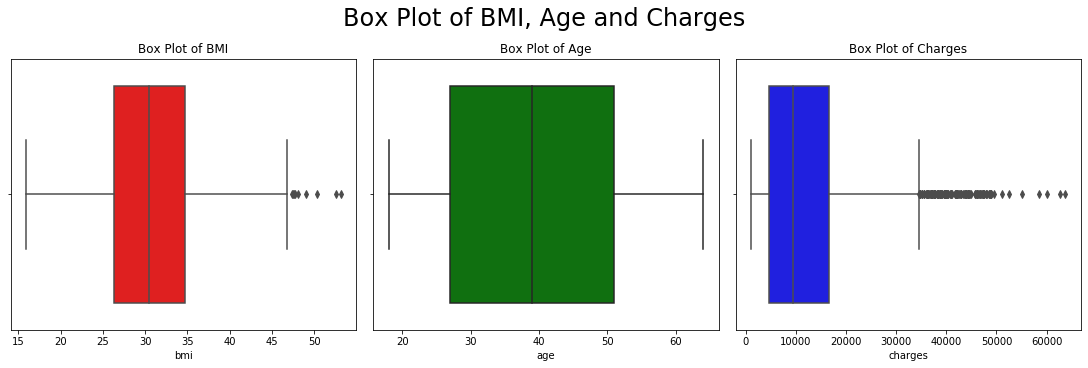

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)
sns.boxplot(x='bmi', data=df, color='r', ax=ax[0]);
sns.boxplot(x='age', data=df, color='g', ax=ax[1]);
sns.boxplot(x='charges', data=df, color='b', ax=ax[2]);
fig.suptitle('Box Plot of BMI, Age and Charges', fontsize=24);
ax[0].set_title('Box Plot of BMI');
ax[1].set_title('Box Plot of Age');
ax[2].set_title('Box Plot of Charges');

From the figure above we can see that BMI have some extreme outliers, Age does not have an outliers, and Charges have a lot of extreme outliers.

In [81]:
def outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lb, ub = q25 - cut_off, q75 + cut_off
    return len([x for x in data if x < lb or x > ub])

In [82]:
bmi_outliers = outliers(df.bmi)
age_outliers = outliers(df.age)
charges_outliers = outliers(df.charges)
print(f'BMI have {bmi_outliers} outliers,\nAge have {age_outliers} outliers,\nCharges have {charges_outliers} outliers')

BMI have 9 outliers,
Age have 0 outliers,
Charges have 139 outliers


# No.2 Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

## 1. We seperate the smoker and non smoker to different data frame

In [83]:
smoker = df[df['smoker']=='yes']
non_smoker = df[df['smoker']=='no']

## 2. Plot the distribution of  Charges by Smoker & Non-Smoker

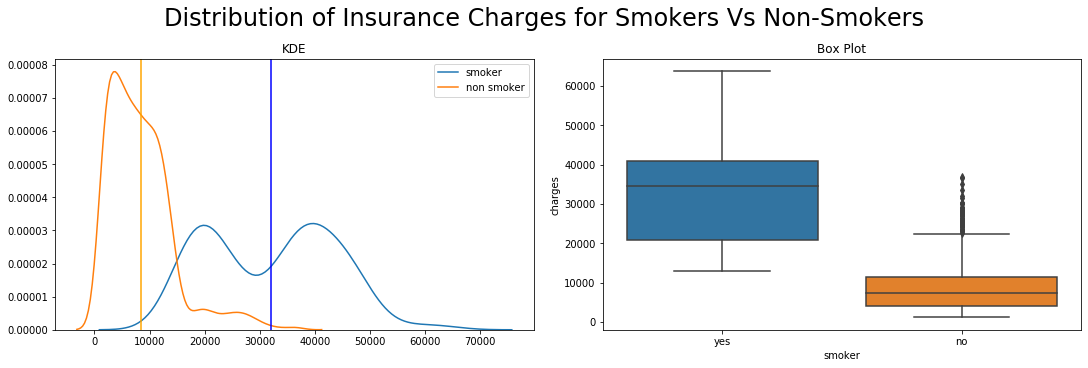

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
sns.kdeplot(smoker.charges,label='smoker', ax=ax[0]);
sns.kdeplot(non_smoker.charges,label='non smoker', ax=ax[0]);
sns.boxplot(x='smoker',y='charges',data=df, ax=ax[1]);
fig.suptitle('Distribution of Insurance Charges for Smokers Vs Non-Smokers', fontsize=24);
ax[0].set_title('KDE');
ax[1].set_title('Box Plot');
ax[0].axvline(smoker.charges.mean(),color='b');
ax[0].axvline(non_smoker.charges.mean(),color='orange');

From the figure above we can see that the two mean are greatly different.

## 3. Two-Sample T-Test (Two Sided) :

### We use T-Test because it is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

__Hypothesis__ :<br>
$H_{0}$ : Mean of Smoker's Insurance Charges ($\mu_{1}$) = Mean of Non-Smoker's Insurance Charges ($\mu_{2}$) <br>
$H_{1}$ : Mean of Smoker's Insurance Charges ($\mu_{1}$) $\neq$ Mean of Non-Smoker's Insurance Charges ($\mu_{2}$) <br>

We use __ttest_ind()__ function from scipy.stats package. We can use this function, if we observe two independent samples from the same or different population. In this situation the two sample come from the same population, so the population variances are equal. The we pass the argument equal_var as True

In [85]:
a = 0.05
stat, pvalue = stats.ttest_ind(non_smoker['charges'], smoker['charges'], equal_var = True)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}\n".format(pvalue,stat))

if pvalue <= a:
    print(f"P-value is less than significant level or {pvalue} < {a}")
    print("H0 is rejected & H1 is accepted")
    print("The average of Smoker's Insurance Charges is not same as the average of Non-Smoker's Insurance Charges")
elif  pvalue > a:
    print(f"P-value is greater than significant level or {pvalue} > {a}")
    print("H0 is accepted")
    print("The average of Smoker's Insurance Charges is same as the average of Non-Smoker's Insurance Charges")

2 sample, 2 sided t-test pvalue:  8.271435842177219e-283 t-stat: -46.664921172723716

P-value is less than significant level or 8.271435842177219e-283 < 0.05
H0 is rejected & H1 is accepted
The average of Smoker's Insurance Charges is not same as the average of Non-Smoker's Insurance Charges
